In [1]:
import numpy as np
from itertools import combinations
from scipy.stats import binom
import scipy.special
import matplotlib.pyplot as plt

In [2]:
def approximation_error_function(V,Sigma,k,X_S):
    d = list(Sigma.shape)[0]
    Sigma = np.multiply(Sigma,Sigma)
    sub_V,_,_ = np.linalg.svd(X_S, full_matrices=False)
    H_hat = np.dot(V.T,sub_V)
    r_vector = np.ones(d) - np.multiply(np.linalg.norm(H_hat,axis = 1),np.linalg.norm(H_hat,axis = 1))
    approximation_error_ratio= np.sqrt(np.sum(np.multiply(Sigma,r_vector))/np.sum(Sigma[k:d]))
    return approximation_error_ratio

In [3]:
def approximation_error_function_2(X,V,Sigma,k,X_S):
    d = list(Sigma.shape)[0]
    Sigma = np.multiply(Sigma,Sigma)
    sub_V,_,_ = np.linalg.svd(X_S, full_matrices=False)
    H_hat = np.dot(sub_V,sub_V.T)
    approximation_error_ratio = np.sqrt(np.linalg.norm(np.dot(np.identity(d)-H_hat,X),'fro'))
    #H_hat = np.dot(V.T,H_hat)
    #sub_V_2 = X_S*(X_S.T*X_S)^(-1)*X_S.T
    #r_vector_2 = 
    #r_vector = np.ones(d) - np.multiply(np.linalg.norm(H_hat,axis = 1),np.linalg.norm(H_hat,axis = 1))
    #approximation_error_ratio=  np.sqrt(np.sum(np.multiply(Sigma,r_vector))/np.sum(Sigma[k:d]))
    return approximation_error_ratio

In [4]:
def probability_approximation_error_for_projection_DPP(X,U_,d,k,N):
    V,Sigma,_ = np.linalg.svd(X, full_matrices=False)
    volumes_array = [np.abs(np.linalg.det(np.dot(U_[:,list(comb)].T,U_[:,list(comb)]))) for comb in combinations(range(N),k)]
    approximation_error_array = [approximation_error_function(V,Sigma,k,X[:,list(comb)]) for comb in combinations(range(N),k)]

    return volumes_array,approximation_error_array

In [24]:
#N = 100
#d = 5
#k = 2

#mean = [0, 0, 0, 0, 0]
#cov = np.diag([1,1,1,0.1,0.1])
#r_X = np.random.multivariate_normal(mean, cov, N).T

N = 100
d = 90
k = 1
alpha = 0.4
mean_X = np.zeros([N])
cov_X = alpha*np.ones((N, N))
cov_X = cov_X + (1-alpha)*np.eye(N)
r_X = np.random.multivariate_normal(mean_X, cov_X, d)






[V,S,U] = np.linalg.svd(r_X, full_matrices=False)

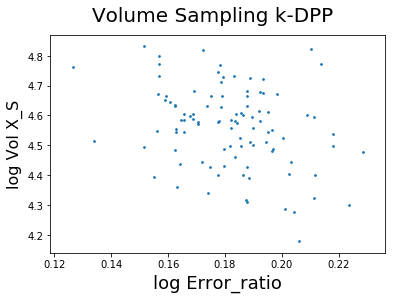

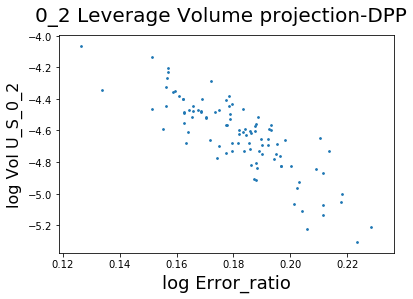

In [25]:
volumes_array_1,approximation_error_array_1 = probability_approximation_error_for_projection_DPP(r_X,r_X,d,k,N)
volumes_array_2,approximation_error_array_2 = probability_approximation_error_for_projection_DPP(r_X,U[0:1, :],d,k,N)
#volumes_array_3,approximation_error_array_3 = probability_approximation_error_for_projection_DPP(r_X,U[3:5, :],d,k,N)
#volumes_array_4,approximation_error_array_4 = probability_approximation_error_for_projection_DPP(r_X,U,d,k,N)

fig = plt.figure()
fig.suptitle('Volume Sampling k-DPP', fontsize=20)
plt.xlabel('log Error_ratio', fontsize=18)
plt.ylabel('log Vol X_S', fontsize=16)
vol_X_scatter = plt.scatter( np.log(approximation_error_array_1),np.log(volumes_array_1),s =3)
plt.show()
#fig = plt.figure()
#fig.suptitle('Leverage Volume k-DPP', fontsize=20)
#plt.xlabel('log Error_ratio', fontsize=18)
#plt.ylabel('log Vol U_S', fontsize=16)
#vol_U_scatter = plt.scatter( np.log(approximation_error_array_4),np.log(volumes_array_4),s =3)
#plt.show()
fig = plt.figure()
fig.suptitle('0_2 Leverage Volume projection-DPP', fontsize=20)
plt.xlabel('log Error_ratio', fontsize=18)
plt.ylabel('log Vol U_S_0_2', fontsize=16)
projection_DPP_0_2_scatter = plt.scatter( np.log(approximation_error_array_2),np.log(volumes_array_2),s =3)
plt.show()
#fig = plt.figure()
#fig.suptitle('3_5 Leverage Volume projection-DPP', fontsize=20)
#plt.xlabel('log Error_ratio', fontsize=18)
#plt.ylabel('log Vol U_S_3_5', fontsize=16)
#projection_DPP_3_5_scatter = plt.scatter( np.log(approximation_error_array_3),np.log(volumes_array_3),s =3)

#plt.show()

In [23]:
np.shape(r_X)

(90, 100)